In [ ]:
!nvidia-smi

Mon Nov 27 10:06:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install plotly

In [3]:
!pip install pywaffle

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

# Artificial Neural Network Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
# Data Visualization Libraries,
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msv
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from matplotlib.gridspec import GridSpec
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from pywaffle import Waffle

# Machine Learning Libraries
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score,f1_score,recall_score,confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

####**Data Loading and Checks**

In [12]:
db_data = pd.read_csv('/content/Diabetes_Health_Indicators.csv').rename(columns={"Diabetes_012": "Diabetes_Status"})

In [13]:
db_data.head()

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [14]:
db_data.shape

(253680, 22)

In [23]:
# Function to get necessary information from the data set in a dataframe
def get_data_info(df):
    data = pd.DataFrame(index=df.columns)
    data['Data_type'] = df.dtypes
    data['Total Value'] = df.count()
    data['Null_count'] = df.isnull().sum()
    data['Unique_count'] = df.nunique()
    data = data.style.set_table_styles([{
        'selector': 'th.row_heading',
        'props': [('text-align', 'left')]
    }, {
        'selector': 'td.row_heading',
        'props': [('text-align', 'left')]
    }])
    return data

get_data_info(db_data)

,Data_type,Total Value,Null_count,Unique_count
Diabetes_Status,float64,253680,0,3
HighBP,float64,253680,0,2
HighChol,float64,253680,0,2
CholCheck,float64,253680,0,2
BMI,float64,253680,0,84
Smoker,float64,253680,0,2
Stroke,float64,253680,0,2
HeartDiseaseorAttack,float64,253680,0,2
PhysActivity,float64,253680,0,2
Fruits,float64,253680,0,2


In [25]:
duplicates = db_data[db_data.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  23899


,Diabetes_Status,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,2.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0


In [ ]:
# eliminating 23,899 duplicate rows from the dataset df1
db_data.drop_duplicates(inplace = True)

**Comment**

- The Data Set has 253680 rows and 22 columns.

- The dataset is clean; having no null values.

- The dataset contained duplicated data points. We dropped the duplicates, totalling 23,899 rows.

####**EDA**

In [27]:
# Checking correlation between columns of dataset db_data
db_data.corr()

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_Status,1.000000,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,0.180272,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
HighBP,0.271596,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.209085,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.067546,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.224379,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.062914,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.107179,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.180272,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.121947,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.042192,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


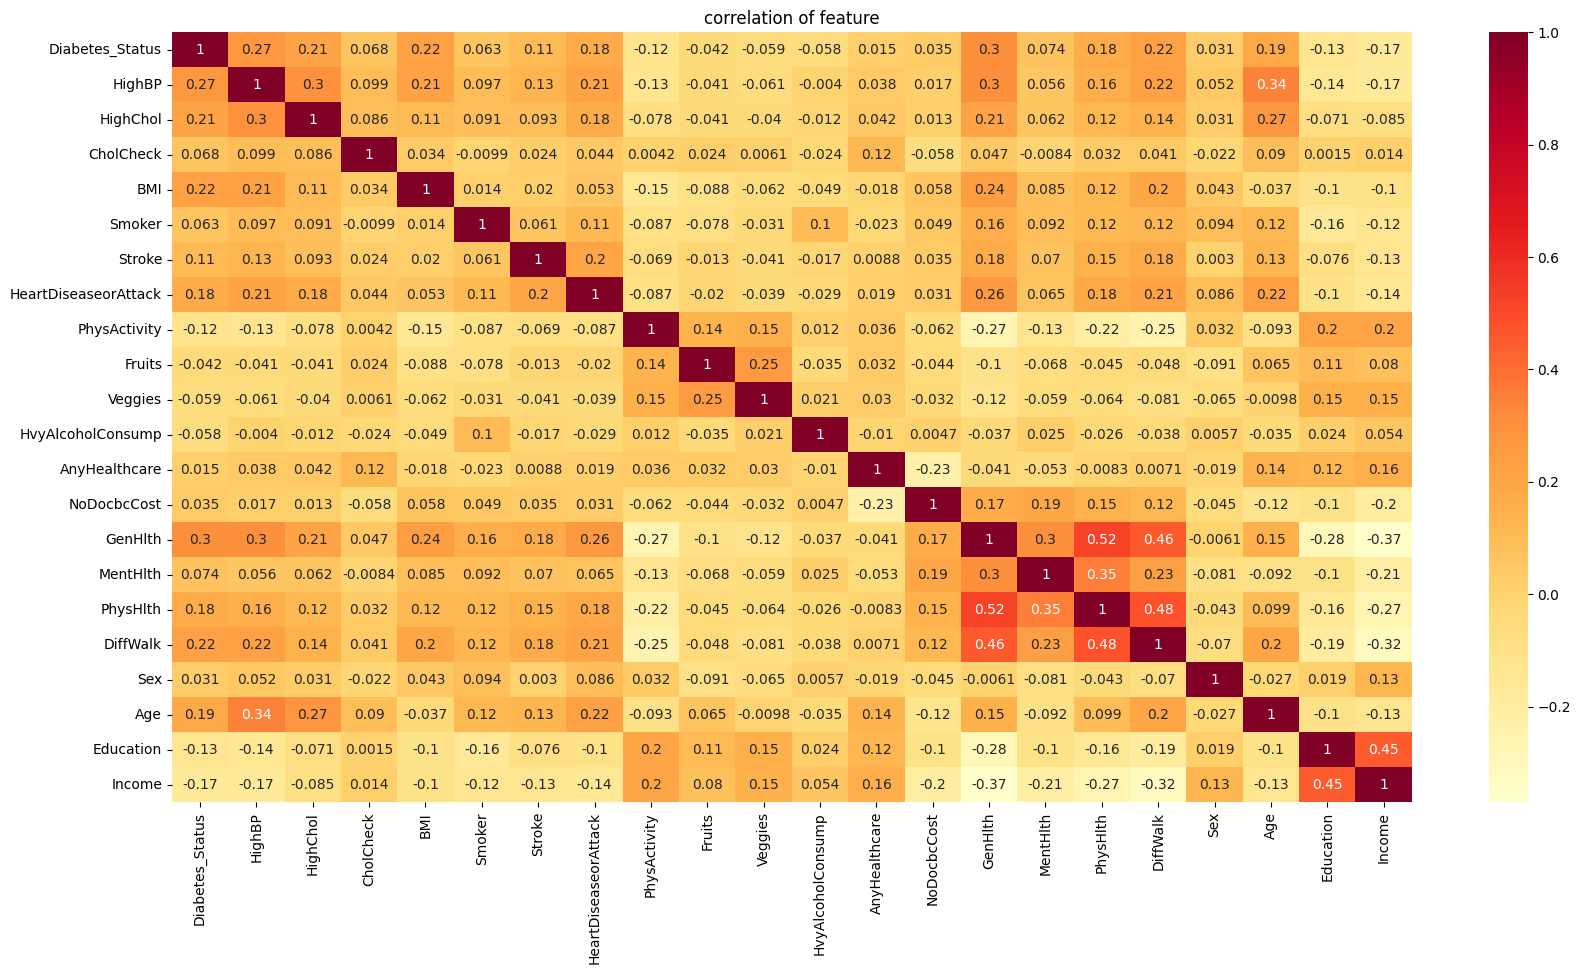

In [29]:
# It is easier to visualize it on a heatmap
# Heatmap of correlation
plt.figure(figsize = (20,10))
sns.heatmap(db_data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")
plt.show()

***
**HighBP**: High blood pressure has a positive correlation, suggesting that individuals with high blood pressure may have a higher likelihood of diabetes.
***
**HighChol**: High cholesterol also shows a positive correlation with diabetes.
***
**CholCheck**: Cholesterol checking has a positive correlation, which may indicate that those who get checked might also be more likely to have diabetes, or it could reflect a general trend in healthcare behavior.
***
**BMI**: Body Mass Index (BMI) has a positive correlation, consistent with the understanding that higher BMI can be a risk factor for diabetes.
***
**Smoker**: Smoking status shows a smaller positive correlation.
***
**Stroke**: Having had a stroke shows a positive correlation with diabetes.
***
**HeartDiseaseorAttack**: Heart disease or having had a heart attack shows a significant positive correlation, suggesting a strong link with diabetes.
***
**PhysActivity**: Physical activity shows a negative correlation, implying that more active individuals might have a lower risk of diabetes.
***
**Fruits**: Eating fruits shows a slight negative correlation.
Veggies: Consuming vegetables also has a slight negative correlation with diabetes.
***
**HvyAlcoholConsump**: Heavy alcohol consumption shows a small negative correlation, but this is not necessarily indicative of a protective effect; it could be due to other factors not shown in the chart.
***
**AnyHealthcare**: Having any healthcare shows a very small positive correlation with diabetes.
***
**NoDocbcCost**: Not seeing a doctor because of cost shows a small positive correlation.
***
**GenHlth**: General health perception has a positive correlation, suggesting that those who perceive their health as poorer might have a higher prevalence of diabetes.
***
**MentHlth**: Mental health status shows a small positive correlation with diabetes.
***
**PhysHlth**: Physical health status has a positive correlation.
***
**DiffWalk**: Difficulty walking has a significant positive correlation, which might be associated with diabetes complications.
***
**Sex**: Sex has a very small positive correlation, but without more context, it's hard to interpret this result.
***
**Age**: Age shows a strong positive correlation, indicating that older individuals are more likely to have diabetes.
***
**Education**: Education level has a small negative correlation with diabetes.
***
**Income**: Income shows a negative correlation, suggesting that higher income individuals may have a lower incidence of diabetes.
***

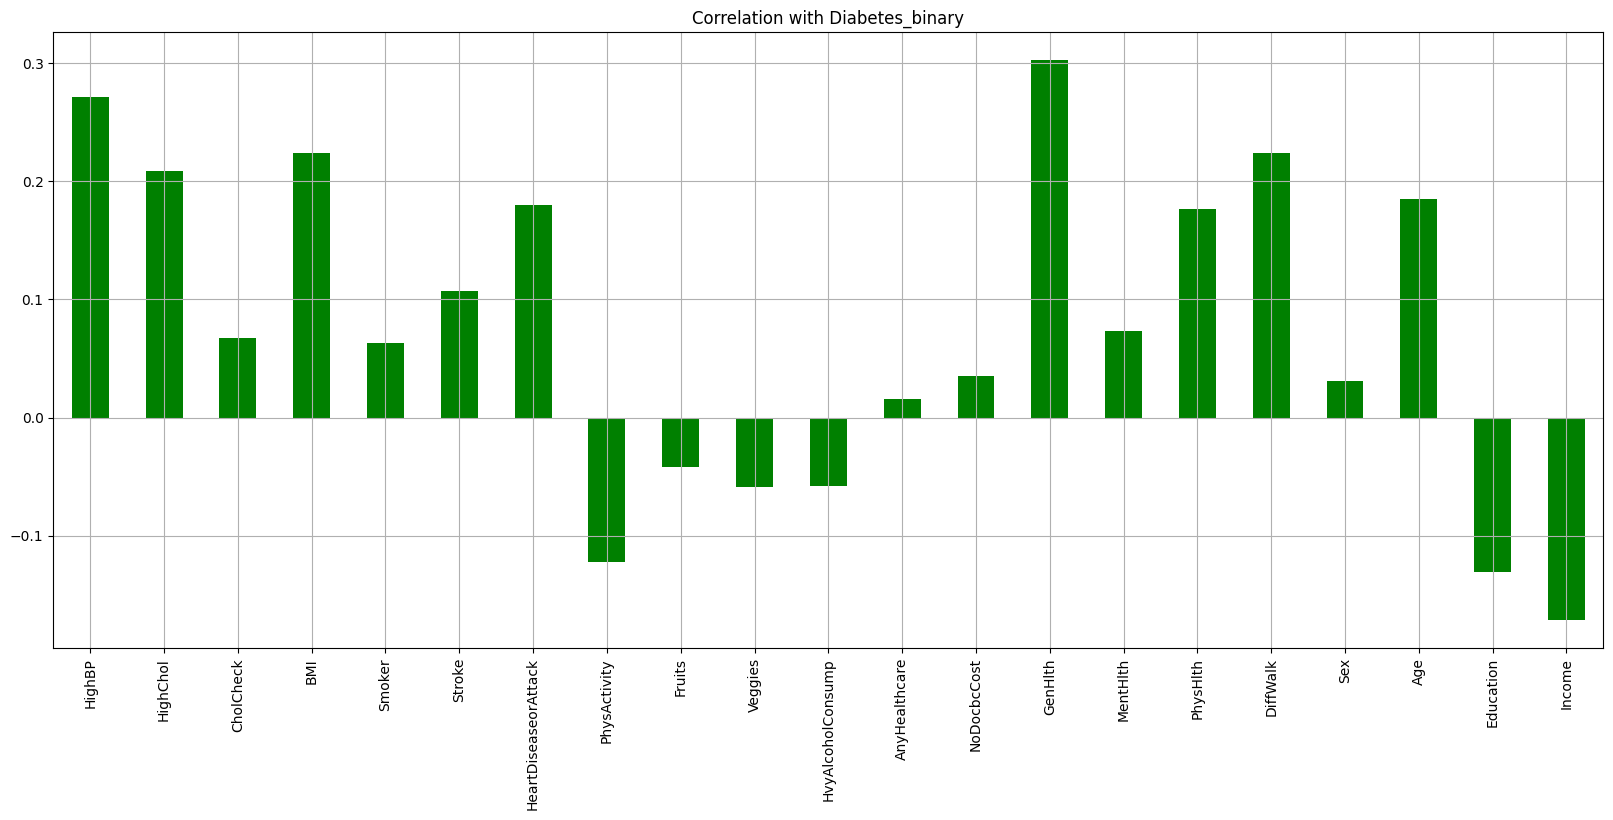

In [32]:
# Let's check columns that are highly collerated with our target column, Diabetic_Binary
db_data.drop('Diabetes_Status', axis=1).corrwith(db_data.Diabetes_Status).plot(kind='bar', grid=True, figsize=(20, 8)
,title="Correlation with Diabetes_binary",color="Green");

In [33]:
"""
Creating a new Column (DiabeticS) to aid in visualization
Replacing 0 into Non-Diabetic and 1 into Diabetic
adding new column Diabetes_binary_str
"""
db_data["DiabeticS"]= db_data["Diabetes_Status"].replace({0:"Non-Diabetic",1:"Diabetic",2:"Diabetic"})

In [34]:
db_data['DiabeticS']

0         Non-Diabetic
1         Non-Diabetic
2         Non-Diabetic
3         Non-Diabetic
4         Non-Diabetic
              ...     
253675    Non-Diabetic
253676        Diabetic
253677    Non-Diabetic
253678    Non-Diabetic
253679        Diabetic
Name: DiabeticS, Length: 253680, dtype: object

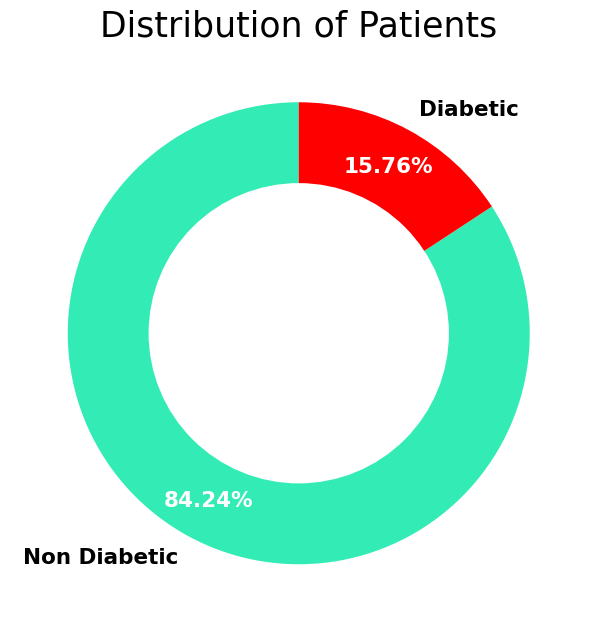

In [49]:
def pieplot(dfcol, label, df_flag, title):
    palette2 = ['#33ECB5','#ff0000']

    colors = ('#E2F11C','#E3460A')
    plt.figure(figsize=(10,7.5))
    if df_flag:
        pie_data = dfcol.value_counts()
    else:
        pie_data = dfcol

    patches, texts, pcts = plt.pie(pie_data,
                                  labels=label,
                                  colors=[palette2[0],'#ff0000'],
                                  pctdistance=0.82,
                                  shadow=False,
                                  startangle=90,
                                  autopct='%1.2f%%',
                                  textprops={'fontsize': 15.5,
                                              'weight': 'bold'
                                              })
    plt.setp(pcts, color='white')

    hfont = {'fontname':'calibri', 'weight': 'bold'}
    plt.title(title, size=25)

    centre_circle = plt.Circle((0,0),0.65,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.savefig("DistributionofPatients.png")
    plt.show()

DiabeticS_Label = ['Non Diabetic','Diabetic']
pieplot(db_data.DiabeticS, DiabeticS_Label, True,
        'Distribution of Patients')

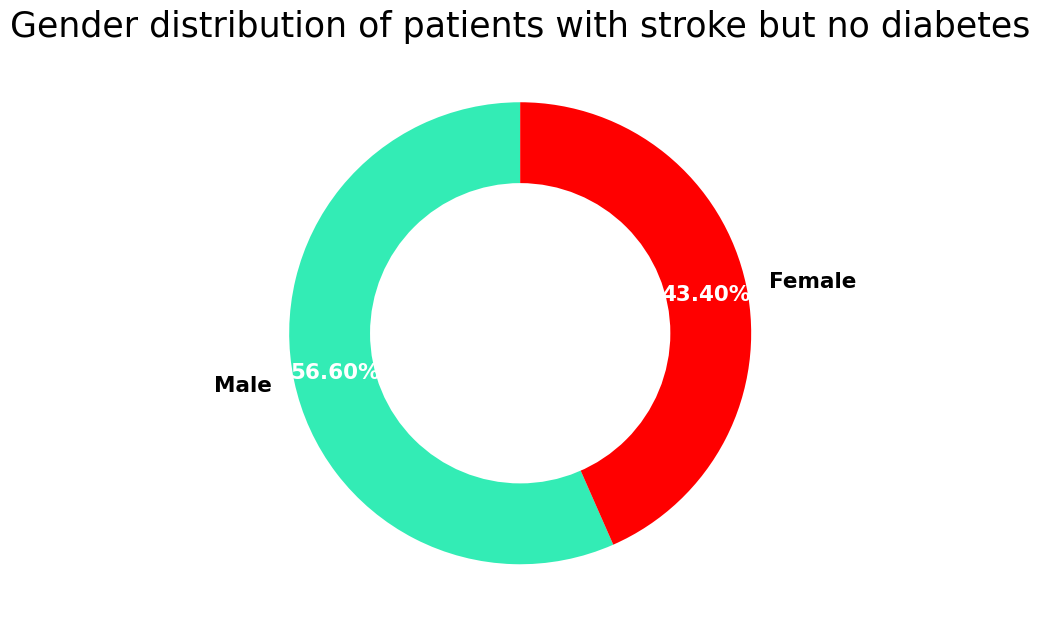

In [52]:
GenderGroupWithoutStroke = db_data[db_data['Diabetes_Status'] == 0.0].groupby(['Sex', 'Diabetes_Status']).count()['Stroke']
GenderGroupWithoutStroke_Label = ['Male','Female']
pieplot(GenderGroupWithoutStroke, GenderGroupWithoutStroke_Label, False,
        'Gender distribution of patients with stroke but no diabetes')

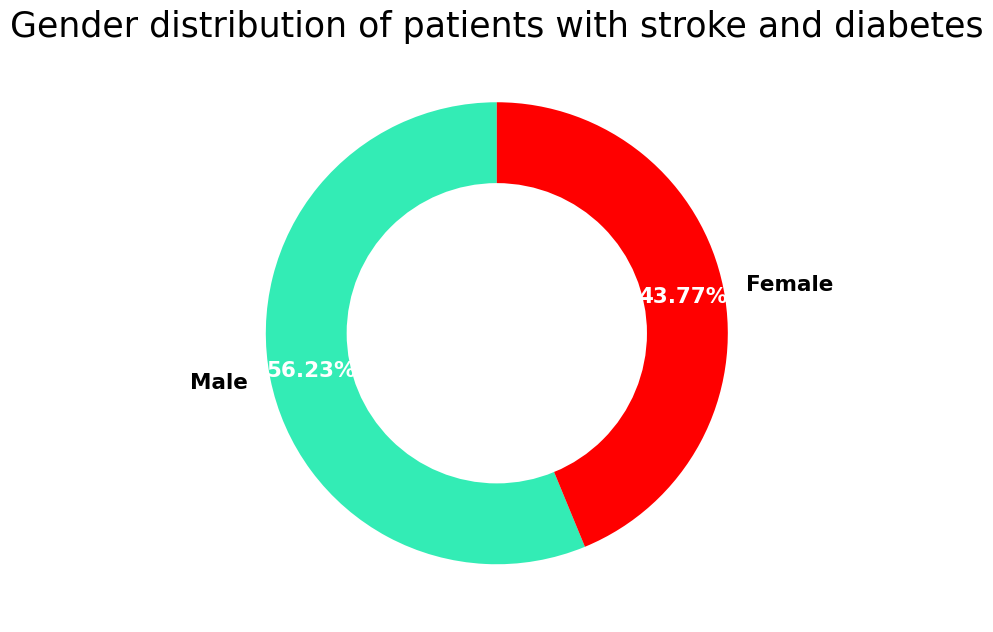

In [53]:
GenderGroupWithStroke = db_data[db_data['Diabetes_Status'] == 1.0].groupby(['Sex', 'Diabetes_Status']).count()['Stroke']
GenderGroupWithStroke

GenderGroupWithStroke_Label = ['Male','Female']
pieplot(GenderGroupWithStroke, GenderGroupWithStroke_Label, False,
        'Gender distribution of patients with stroke and diabetes')

### Assumption 1: MALE ARE MORE SUSCEPTIBLE TO STROKE DUE TO HIGH WORK RELATED STRESS

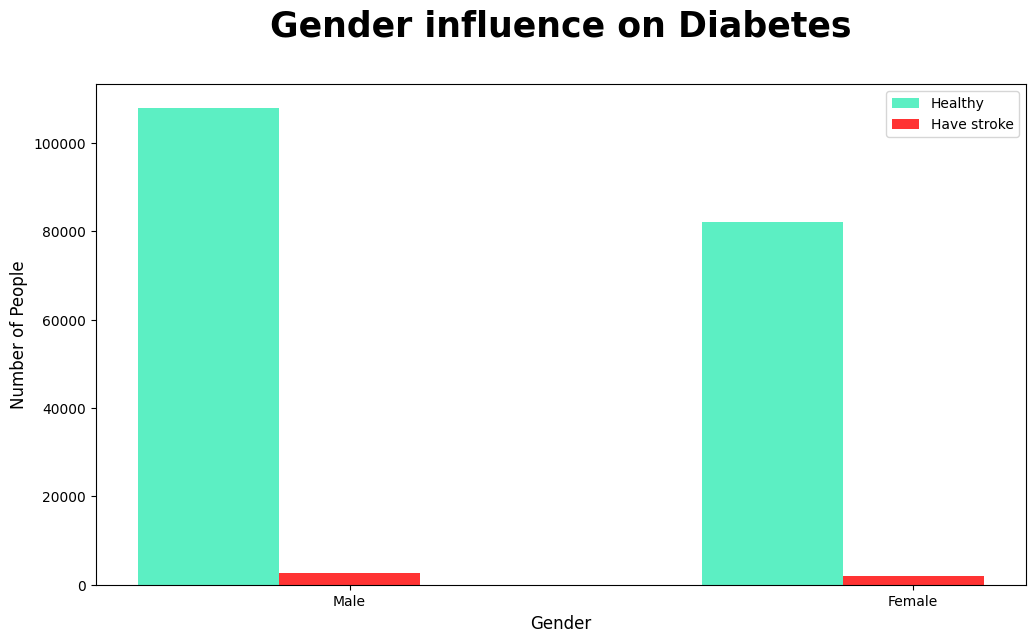

In [ ]:
n_groups = 2

# create plot
plt.figure(figsize=(12,6.5))
indexx = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(indexx, GenderGroupWithoutStroke, bar_width,
alpha=opacity,
color= palette2[0],
label='Healthy')

rects2 = plt.bar(indexx + bar_width, GenderGroupWithStroke, bar_width,
alpha=opacity,
color='#ff0000',
label='Have stroke')

plt.xlabel('Gender', size=12)
plt.ylabel('Number of People',size=12)
plt.title('Gender influence on Diabetes\n',size=25, **hfont)
plt.xticks(indexx + bar_width, ('Male', 'Female'))
plt.legend()
plt.savefig("GenderInfluence.png")
plt.show()

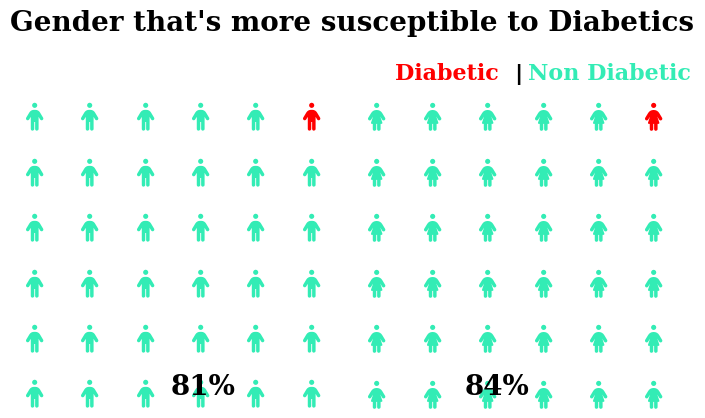

In [ ]:
#Let's visualize the data by finding the percentage of people living with Diabetics and without Diabetics based on gender
stroke_gen = db_data[db_data['Diabetes_Status'] == 1]['Sex'].value_counts()
healthy_gen = db_data[db_data['Diabetes_Status'] == 0]['Sex'].value_counts()

female = db_data['Sex'].value_counts().values[0]
male =  db_data['Sex'].value_counts().values[1]

stroke_female = int(round (stroke_gen.values[0] / female * 100, 0))
stroke_male = int(round( stroke_gen.values[1] / male *100, 0))
healthy_female = int(round(healthy_gen.values[0] / female * 100, 0))
healthy_male = int(round(healthy_gen.values[1] / male *100, 0))

female_per = int(round(female/(female+male) * 100, 0))
male_per = int(round(male/(female+male)* 100, 0))

fig = plt.figure(FigureClass = Waffle,
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#fff',dpi = 100,

                 plots = {121:
                          {
                           'rows':6,
                           'columns': 6,
                           'values' : [healthy_male,stroke_male],
                            'colors' : [palette2[0],'#ff0000'],
                              'vertical' : True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'male',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                          },

                          122 :
                          {
                            'rows': 6,
                            'columns':6,
                            'values':[healthy_female,stroke_female],
                              'colors' : [palette2[0],'#ff0000'],
                              'vertical': True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'female',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1

                           }
                         },

)
fig.text(0., 0.8, "Gender that's more susceptible to Diabetics", {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
fig.text(0.23, 0.28, '{}%'.format(healthy_male), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#000000'},alpha = 1,)
fig.text(0.65, 0.28, '{}%'.format(healthy_female), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#000000'}, alpha = 1)
fig.text(0.55,0.73, 'Diabetic ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#ff0000'})
fig.text(0.72,0.73, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(0.74,0.73, 'Non Diabetic', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':palette2[0]},alpha = 1)
plt.savefig("GenderProportion.png")
fig.show()

<h3 style='color:#ff0000;font-family:cursive'><i class='fa fa-info'></i> From the above diagram, it shows that the assumption is wrong. Being a male doesn't mean you're more susceptible to Diabetics. </h3>

In [ ]:
#Categorizing  BMI, Age and Glucose Columns into categorical values using range.
#Categories used
#Age: 1-2   :  Young Adults,    BMI: 0-18  : Underweight       Income Scale:   1-4      : Low Income
#     3-8  :  Adults,                19-24 : Ideal                             4-7    : Average Income
#     9-15  :  Old                   25-30 : Overweight                        8-15   : High Income
#                                    30-50 : Obesity

db_data['bmi_cat'] = pd.cut(db_data['BMI'], bins = [0, 19, 25,30,50], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
db_data['age_cat'] = pd.cut(db_data['Age'], bins = [0,2,8, 15], labels = ['Young Adults', 'Adults', 'Old People'])
db_data['income_Cat'] = pd.cut(db_data['Income'], bins = [0,4,7,15], labels = ['Low Income', 'Average Income', 'High Income'])

In [ ]:
db_data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,PhysHlth,DiffWalk,Sex,Age,Education,Income,DiabeticS,bmi_cat,age_cat,income_Cat
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,15.0,1.0,0.0,9.0,4.0,3.0,Non-Diabetic,Obesity,Old People,Low Income
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,7.0,6.0,1.0,Non-Diabetic,Ideal,Adults,Low Income
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,30.0,1.0,0.0,9.0,4.0,8.0,Non-Diabetic,Overweight,Old People,High Income
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,11.0,3.0,6.0,Non-Diabetic,Overweight,Old People,Average Income
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,11.0,5.0,4.0,Non-Diabetic,Ideal,Old People,Low Income


### <i class='fa fa-question'> </i> Question 1) DOES AGE HAVE AN IMPACT ON DIABETICS?

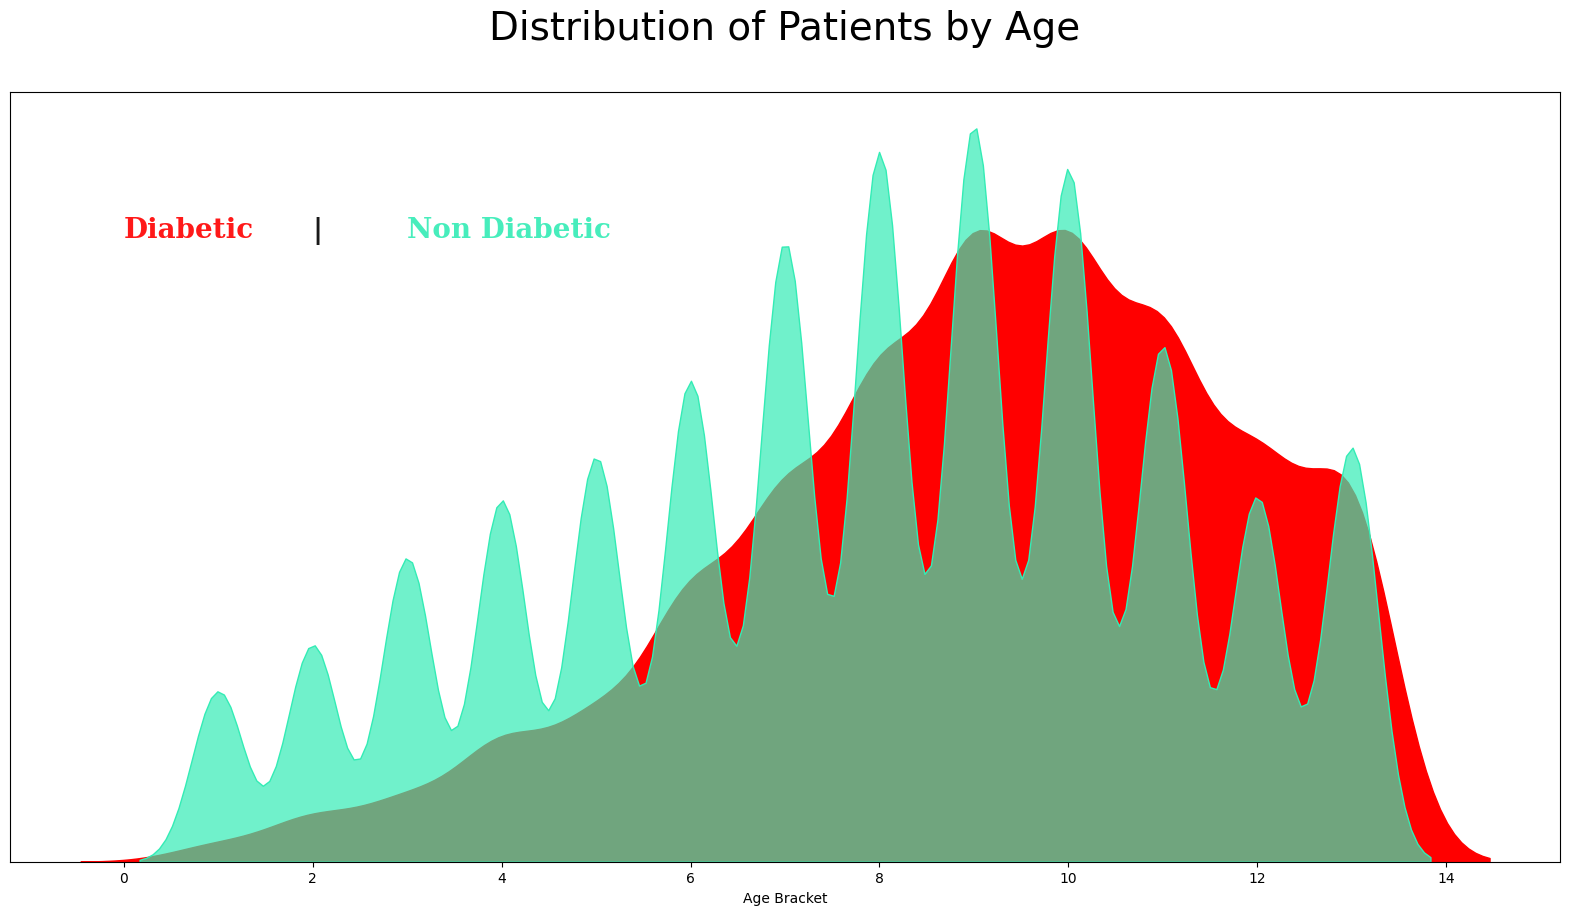

In [ ]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.title('Distribution of Patients by Age\n', size=28)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)
ax.text(0, 0.15, 'Diabetic', {'font': 'Serif',
                             'size': '20',
                             'weight': 'bold',
                             'color': '#ff0000'}, alpha=0.9)

ax.text(2, 0.15, '|', {'font': 'Serif',
                       'size': '20',
                       'weight': 'bold',
                       'color': 'black'}, alpha=0.9)

ax.text(3, 0.15, 'Non Diabetic', {'font': 'Serif',
                              'size': '20',
                              'weight': 'bold',
                              'color': palette2[0]}, alpha=0.9)

sns.kdeplot(data=db_data[db_data.Diabetes_Status == 1],
            x='Age', shade=True, ax=ax, color='#ff0000', alpha=1)
sns.kdeplot(data=db_data[db_data.Diabetes_Status == 0],
            x='Age', shade=True, ax=ax, color=palette2[0], alpha=0.7)
plt.xlabel('Age Bracket')
plt.savefig("DistributionofPatientsbyage.png")
plt.show()

In [ ]:
breakdownbyage = db_data.groupby(['age_cat','Diabetes_Status']).size().reset_index(name ='Count')
breakdownbyage

,age_cat,Diabetes_012,Count
0,Young Adults,0.0,12287
1,Young Adults,1.0,75
2,Young Adults,2.0,218
3,Adults,0.0,91350
4,Adults,1.0,1657
5,Adults,2.0,11042
6,Old People,0.0,86418
7,Old People,1.0,2897
8,Old People,2.0,23837


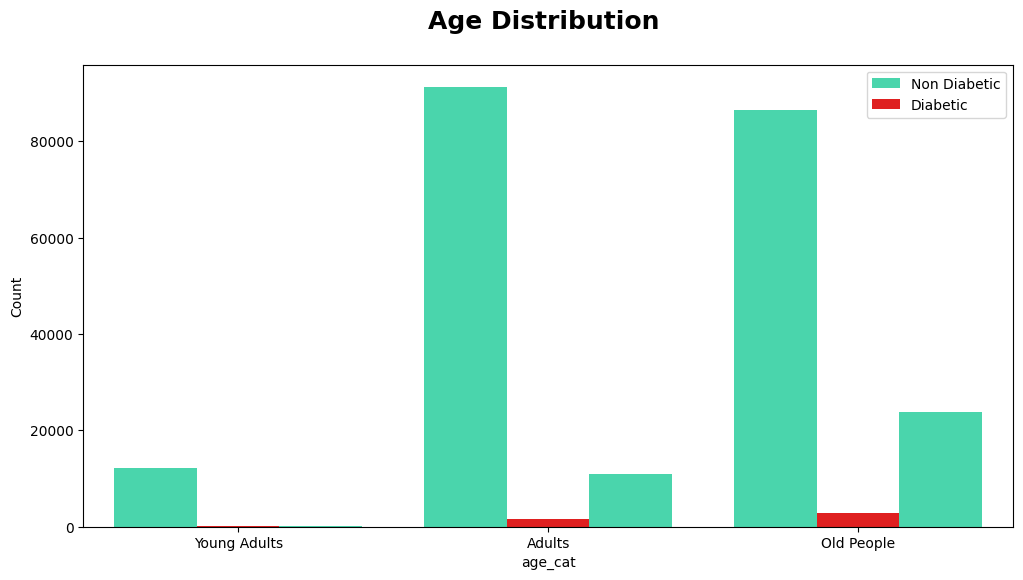

In [ ]:
plt.figure(figsize = (12,6))
labels=["Non Diabetic","Diabetic"]
g = sns.barplot(x ='age_cat', y = 'Count', hue = 'Diabetes_Status', data = breakdownbyage, palette = palette2)
h, l = g.get_legend_handles_labels()
g.legend(h, labels, title="")
plt.title("Age Distribution \n",size=18, **hfont)
plt.savefig("AgeDistribution.png")
plt.show()

In [ ]:
breakdownbybmi = db_data.groupby(['bmi_cat','Diabetes_Status']).size().reset_index(name ='Count')
breakdownbybmi

,bmi_cat,Diabetes_012,Count
0,Underweight,0.0,6292
1,Underweight,1.0,66
2,Underweight,2.0,304
3,Ideal,0.0,64026
4,Ideal,1.0,886
5,Ideal,2.0,5215
6,Overweight,0.0,68505
7,Overweight,1.0,1631
8,Overweight,2.0,11419
9,Obesity,0.0,49827


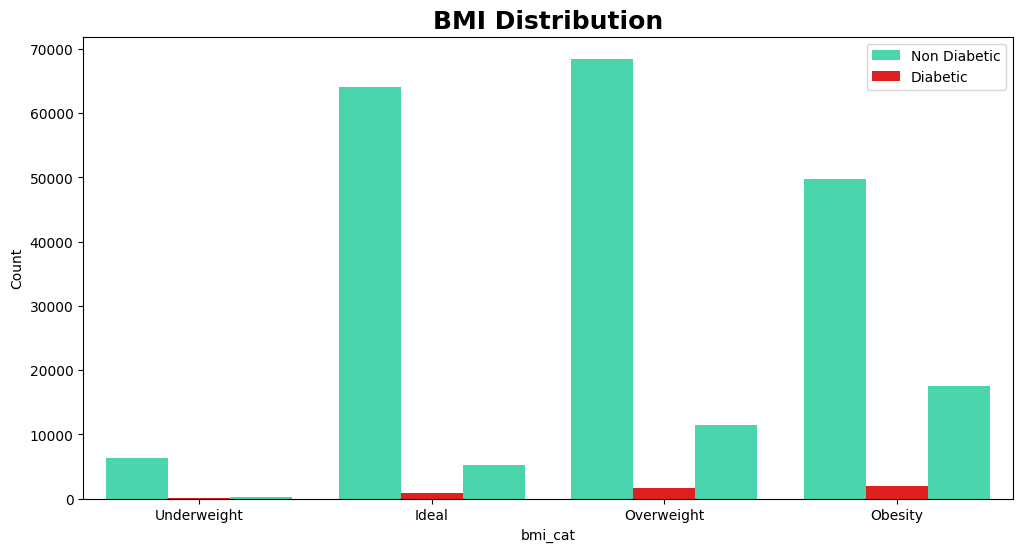

In [ ]:
plt.figure(figsize = (12,6))
labels=["Non Diabetic","Diabetic"]
g = sns.barplot(x ='bmi_cat', y = 'Count', hue = 'Diabetes_Status', data = breakdownbybmi, palette = palette2)
h, l = g.get_legend_handles_labels()
g.legend(h, labels, title="")
plt.title("BMI Distribution",size=18, **hfont)
plt.savefig("BMIDistribution.png")
plt.show()

In [ ]:
breakdownbyincome = db_data.groupby(['income_Cat','Diabetes_Status']).size().reset_index(name ='Count')
breakdownbyincome

,income_Cat,Diabetes_012,Count
0,Low Income,0.0,42798
1,Low Income,1.0,1550
2,Low Income,2.0,13080
3,Average Income,0.0,83492
4,Average Income,1.0,2068
5,Average Income,2.0,14975
6,High Income,0.0,63765
7,High Income,1.0,1011
8,High Income,2.0,7042


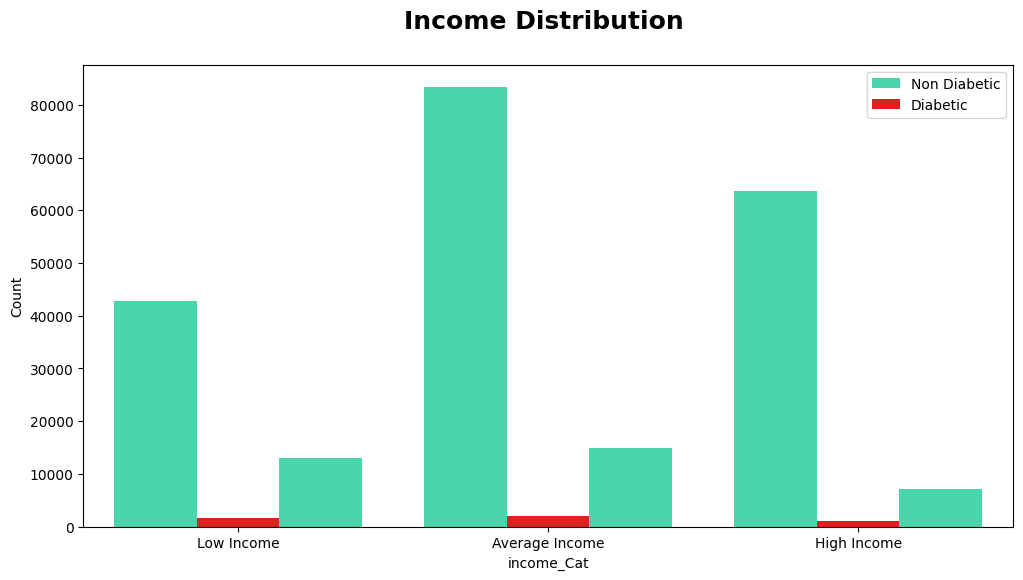

In [ ]:
plt.figure(figsize = (12,6))
labels=["Non Diabetic","Diabetic"]
g = sns.barplot(x ='income_Cat', y = 'Count', hue = 'Diabetes_Status', data = breakdownbyincome, palette = palette2)
h, l = g.get_legend_handles_labels()
g.legend(h, labels, title="")
plt.title("Income Distribution \n",size=18, **hfont)
plt.savefig("IncomeDistribution.png")
plt.show()

In [ ]:
breakdownbystroke = db_data.groupby(['Smoker','Diabetes_Status']).size().reset_index(name ='Count')
breakdownbystroke

,Smoker,Diabetes_012,Count
0,0.0,0.0,103559
1,0.0,1.0,2348
2,0.0,2.0,16874
3,1.0,0.0,86496
4,1.0,1.0,2281
5,1.0,2.0,18223


In [ ]:
# db_data[db_data['Diabetes_binary'] == 0.0].groupby(['HighBP','Diabetes_binary']).count()['HighBP']

In [ ]:
db_data.groupby(['HighBP','Diabetes_Status']).count().reset_index()[['HighBP','HighChol']]

,HighBP,HighChol
0,0.0,114950
1,0.0,1717
2,0.0,8692
3,1.0,75105
4,1.0,2912
5,1.0,26405


In [ ]:
HypertensionGroupWithoutStroke = db_data[db_data['Diabetes_Status'] == 0.0].groupby(['HighBP','Diabetes_Status']).count()['HighChol']
HypertensionGroupWithoutStroke

HighBP  Diabetes_012
0.0     0.0             114950
1.0     0.0              75105
Name: HighChol, dtype: int64

In [ ]:
HypertensionGroupWithStroke = db_data[db_data['Diabetes_Status'] == 1.0].groupby(['HighBP','Diabetes_Status']).count()['HighChol']
HypertensionGroupWithStroke

HighBP  Diabetes_012
0.0     1.0             1717
1.0     1.0             2912
Name: HighChol, dtype: int64

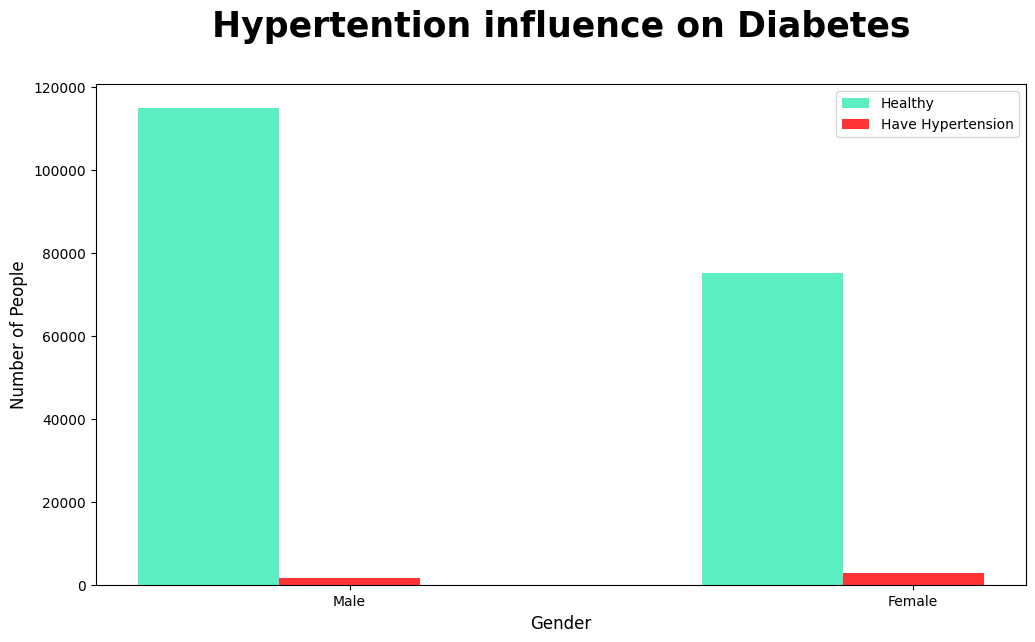

In [ ]:
n_groups = 2

# create plot
plt.figure(figsize=(12,6.5))
indexx = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(indexx, HypertensionGroupWithoutStroke, bar_width,
alpha=opacity,
color= palette2[0],
label='Healthy')

rects2 = plt.bar(indexx + bar_width, HypertensionGroupWithStroke, bar_width,
alpha=opacity,
color='#ff0000',
label='Have Hypertension')

plt.xlabel('Gender', size=12)
plt.ylabel('Number of People',size=12)
plt.title('Hypertention influence on Diabetes\n',size=25, **hfont)
plt.xticks(indexx + bar_width, ('Male', 'Female'))
plt.legend()
plt.savefig("HypertensionInfluence.png")
plt.show()

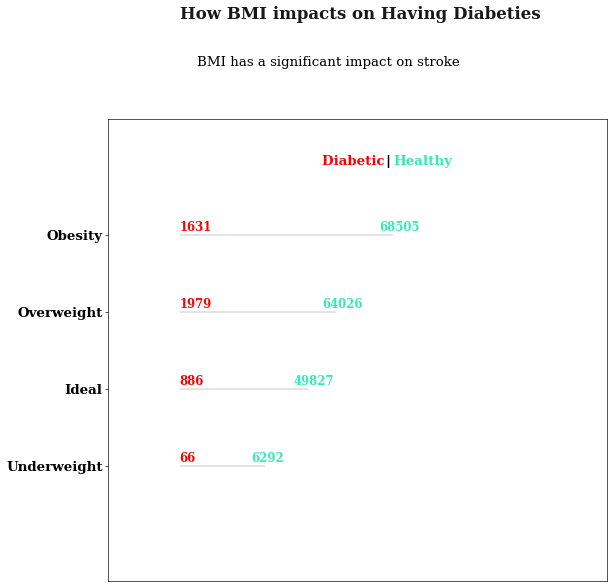

In [ ]:
# Let's Visualize those that have Stroke using the BMI Levels Category using a dumbell plot

fig = plt.figure(figsize = (24,10), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)

ax1 = fig.add_subplot(gs[0:,13:]) #dumbbell plot
stroke_bmi = db_data[db_data['Diabetes_Status'] == 1].bmi_cat.value_counts()
healthy_bmi = db_data[db_data['Diabetes_Status'] == 0].bmi_cat.value_counts()

ax1.hlines(y = ['Underweight','Ideal','Overweight','Obesity'], xmin = [1,1,1,1],
          xmax = [600,900,1100,1500], color = 'grey',**{'linewidth':0.5})


# sns.scatterplot(y = stroke_bmi.index[[3,2,0,1]], x = stroke_bmi.values[[3,2,0,1]], s = stroke_bmi.values, color = '#ff0000', ax= ax1, alpha = 1)
# sns.scatterplot(y = healthy_bmi.index[[0,1,2,3]], x = healthy_bmi.values[[0,1,2,3]], s = healthy_bmi.values, color = palette2[0], ax= ax1, alpha = 1)

ax1.axes.get_xaxis().set_visible(False)
ax1.set_xlim(xmin = -500, xmax = 3000)
ax1.set_ylim(ymin = -1.5,ymax = 4.5)

ax1.set_yticklabels( labels = ['Underweight','Ideal','Overweight','Obesity'],fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

ax1.text(0,5.8, 'How BMI impacts on Having Diabeties' ,{'font': 'Serif', 'size': '20','weight':'bold', 'color':'black'},alpha = 0.9)
ax1.text(1000,3.9, '\nDiabetic ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#ff0000'})
ax1.text(1440,3.9, '\n|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax1.text(1500,3.9, '\nHealthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':palette2[0]})
ax1.text(120,5., 'BMI has a significant impact on stroke\n',
        {'font':'Serif', 'size':'16','color': 'black'})

ax1.text(0,3.05, stroke_bmi.values[1], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#ff0000'})
ax1.text(1400,3.05, healthy_bmi.values[0], {'font':'Serif', 'size':14, 'weight':'bold', 'color':palette2[0]})

ax1.text(0,2.05, stroke_bmi.values[0], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#ff0000'})
ax1.text(1000,2.05, healthy_bmi.values[1], {'font':'Serif', 'size':14, 'weight':'bold', 'color':palette2[0]})

ax1.text(0* 0.010,1.05, stroke_bmi.values[2], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#ff0000'})
ax1.text(800,1.05, healthy_bmi.values[2], {'font':'Serif', 'size':14, 'weight':'bold', 'color':palette2[0]})

ax1.text(0,0.05, stroke_bmi.values[3], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#ff0000'})
ax1.text(500,0.05, healthy_bmi.values[3], {'font':'Serif', 'size':14, 'weight':'bold', 'color':palette2[0]})
plt.savefig("BMILevelOnStroke.png")
plt.show()

In [ ]:
db_data = db_data.drop(['bmi_cat','age_cat','income_Cat','DiabeticS'],axis='columns')

In [ ]:
get_data_info(db_data)

,Data_type,Total Value,Null_count,Unique_count
Diabetes_012,float64,229781,0,3
HighBP,float64,229781,0,2
HighChol,float64,229781,0,2
CholCheck,float64,229781,0,2
BMI,float64,229781,0,84
Smoker,float64,229781,0,2
Stroke,float64,229781,0,2
HeartDiseaseorAttack,float64,229781,0,2
PhysActivity,float64,229781,0,2
Fruits,float64,229781,0,2


In [ ]:
db_data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
db_data["Diabetes_Status"] = db_data["Diabetes_Status"].replace({2:1})

In [ ]:
db_data["Diabetes_Status"].value_counts()

0.0    190055
1.0     39726
Name: Diabetes_012, dtype: int64

In [ ]:
X = db_data.drop(['Diabetes_Status'],axis='columns')
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
y = db_data.Diabetes_Status
y[:5]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Diabetes_012, dtype: float64

In [ ]:
X.shape,y.shape

((229781, 21), (229781,))

<h3 style='font-weight:bold;color:#000000;text-align:center'>    HYPERPARAMETER TUNING </h3>

In [ ]:
#Python Dictionary with 5 supervised models and parameters to choose the best Models and Parameters to use.

model_params = {
    'Decision Tree': {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion':['gini','entropy'],
            'splitter': ['best','random'],
            'max_depth': [1,2,5,10,50,100],
            'random_state': [1,2,5,10]
        }
    },
    'Random_forest':{
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10],
            'n_jobs': [1,10,20],
         }
    },
    'Logistic_regression' :{
        'model' : LogisticRegression(),
        'params': {
            'C': [1,5,10],
            'solver':['liblinear','saga'],
            'multi_class':['auto'],
            'random_state': [1,2,10],
            'penalty': ['l1','l2','elasticnet','none']
        }
    },
    'K_Nearest_Neighbour' :{
        'model' : KNeighborsClassifier(),
        'params' :{
            'n_neighbors': [1,5,10],
            'algorithm': ["auto", "brute", "kd_tree", "ball_tree"],
            'weights': ['uniform','distance'],
            'n_jobs' : [1,10,20]
        }
    },
    'Gradient_Boost': {
        'model': GradientBoostingClassifier(),
        'params' :{
            'learning_rate': [0.01],
            'loss': ['exponential'],
            'max_depth': [50,70],
            'max_features': [1,2],
            'n_estimators': [1,10]
        }
    }
}

In [ ]:
scores = [] #check list comprehension

for model_name,mp in model_params.items():
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)
    sm = SMOTE(random_state=0)
    X_train,y_train = sm.fit_resample(X_train,y_train)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    rs = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    rs.fit(X_train,y_train)
    scores.append({
        'Model': model_name,
        'Best_Score': rs.best_score_,
        'Best_Parameters':rs.best_params_
    })

In [ ]:
pd.options.display.max_colwidth = 200
scoresdf = pd.DataFrame(scores,columns=['Model','Best_Score','Best_Parameters'])
scoresdf.sort_values(by='Best_Score',ascending=False, inplace=True)
scoresdf

####**Model Development**

In [ ]:
models_results = {}

def show_model_results(X,y,model_name,model,rand_state,Datasplit=0.2,**kwargs):
    print(f'The model {model_name} with parameters : {kwargs}')
    # Create an object m of the model with parameters entered into the function
    m = model(**kwargs)
    # Split data into training and testing set
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=Datasplit,random_state=rand_state,stratify=y)
    # Create an object of a SMOTE (Oversampling library)
    sm = SMOTE(random_state=0)
    # Performing oversampling on our train set
    X_train,y_train = sm.fit_resample(X_train,y_train)
    # Create an object of our scaling class
    scaler = StandardScaler()
    # Scale our X set
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # Model training
    m.fit(X_train,y_train)
    # Get model score
    score = m.score(X_test,y_test)
    # Get model predictions
    prediction = m.predict(X_test)
    # Get model precision score
    model_precision = precision_score(y_test,prediction)
    # Get model recall score
    recall = recall_score(y_test,prediction)
    # Get model F1 score
    F1 = f1_score(y_test,prediction)
    print('')
    print('***************************************************************')
    print(f'Model name:        \t {model_name}')
    print(f'Model Parameters:  \t {kwargs}')
    print(f'Model Score:       \t {score}')
    print(f'Model Precision Score:   {model_precision}')
    print(f'Model Recall Score:  \t {recall}')
    print(f'Model F1 Score:  \t {F1}')
    print('***************************************************************')
    # Call function plot_confusion matrix
    plot_confusion_matrics(m,X_test,y_test,model_name)
    return score,model_name,F1,model_precision,recall
# Function to plot our models confusion matrix
def plot_confusion_matrics(model, X_test, y_test,model_name):
    # Get model prediction
    y_pred = model.predict(X_test)
    # confusion matrix
    matrix = confusion_matrix(y_test, y_pred)
    # Dataframe to store values
    df_cm = pd.DataFrame(matrix, index = ['Diabetic', 'Healthy'],
                                columns = ['Diabetic', 'Healthy'])
    plt.figure(figsize = (12,8))
    #plot confusion matrix
    sns.heatmap(df_cm,
                annot=True,
                cmap='Greens',
                fmt='.5g',
                annot_kws={"size": 20}).set_title('Confusion matrix', fontsize = 35, y=1.05)
    plt.xlabel('Predicted values', fontsize = 20)
    plt.ylabel('True values', fontsize = 20)
    plt.savefig(f"{model_name}.png")
    plt.show()

**1. RANDOM FOREST CLASSIFIER**

The model Random Forest with parameters : {'n_estimators': 10, 'n_jobs': 20}

***************************************************************
Model name:        	 Random Forest
Model Parameters:  	 {'n_estimators': 10, 'n_jobs': 20}
Model Score:       	 0.8160236743042409
Model Precision Score:   0.4345818368394048
Model Recall Score:  	 0.213215859030837
Model F1 Score:  	 0.286076163134341
***************************************************************


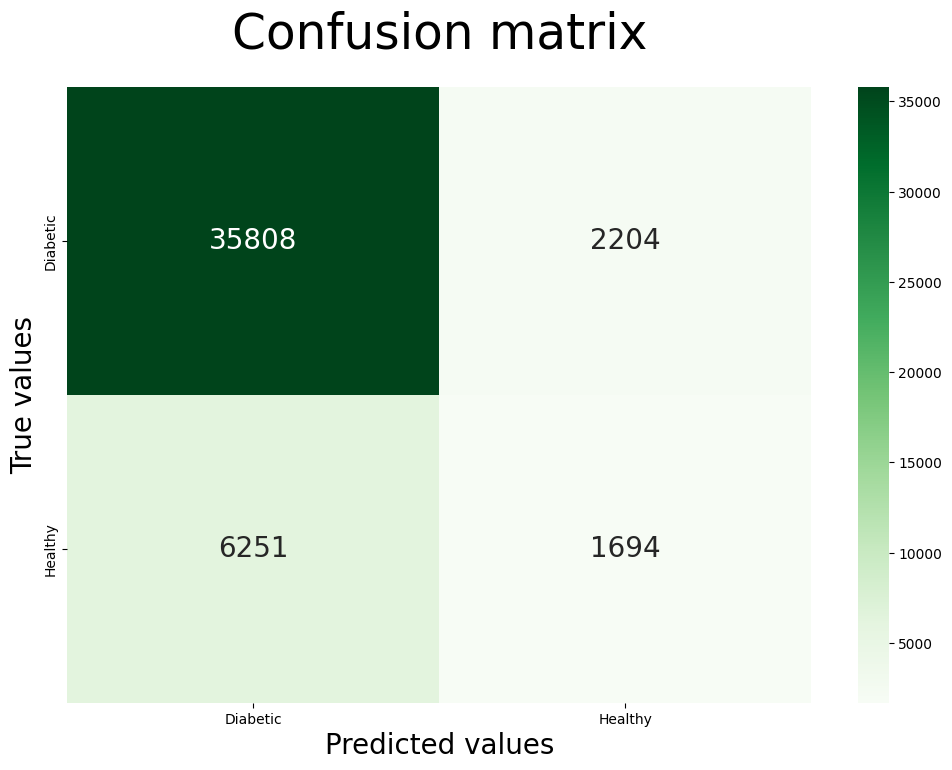

In [ ]:
#'n_estimators': 10, 'n_jobs': 20
rnd_state = 10
# Call show model result and pass parameters from Hyperparameter tuning
output = show_model_results(X,y,'Random Forest',RandomForestClassifier,n_estimators=10,n_jobs=20,rand_state=rnd_state)
# Save outputs in a dictionary
models_resultsRC = ({
    'Model Name': output[1],
    'Model Score': output[0],
    'F1 Score': output[2],
    'Precision Score': output[3],
    'Recall Score': output[4]
})

**2. K NEAREST NEIGHBOURS**

The model KNN with parameters : {'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 1, 'weights': 'uniform'}

***************************************************************
Model name:        	 KNN
Model Parameters:  	 {'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 1, 'weights': 'uniform'}
Model Score:       	 0.7600365559109602
Model Precision Score:   0.314030643020871
Model Recall Score:  	 0.3276274386406545
Model F1 Score:  	 0.3206849821362572
***************************************************************


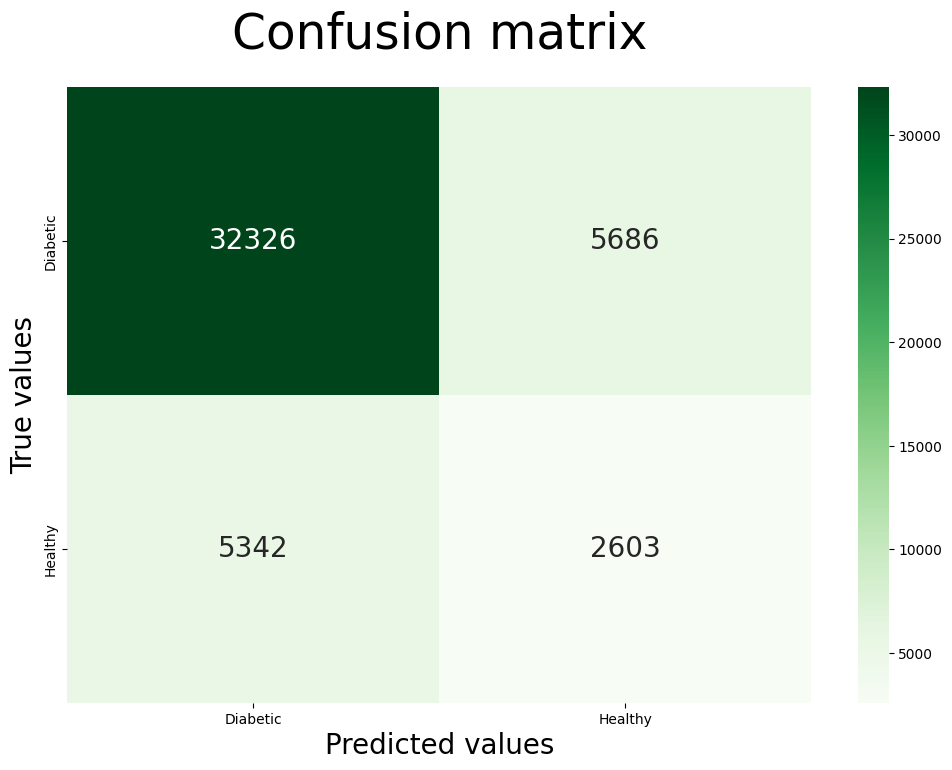

In [ ]:
rnd_state = 1
# Call show model result and pass parameters from Hyperparameter tuning
output = show_model_results(X,y,'KNN',KNeighborsClassifier,algorithm='auto',n_jobs=1,n_neighbors= 1,weights='uniform',rand_state=rnd_state)
# Save outputs in a dictionary
models_resultsKN = ({
    'Model Name': output[1],
    'Model Score': output[0],
    'F1 Score': output[2],
    'Precision Score': output[3],
    'Recall Score': output[4]
})

**3. Gradient Boost**

The model Gradient Boost with parameters : {'learning_rate': 0.01, 'loss': 'exponential', 'max_depth': 10, 'max_features': 1, 'n_estimators': 200}

***************************************************************
Model name:        	 Gradient Boost
Model Parameters:  	 {'learning_rate': 0.01, 'loss': 'exponential', 'max_depth': 10, 'max_features': 1, 'n_estimators': 200}
Model Score:       	 0.7994211980764628
Model Precision Score:   0.43342746574626084
Model Recall Score:  	 0.5215859030837005
Model F1 Score:  	 0.473437678510225
***************************************************************


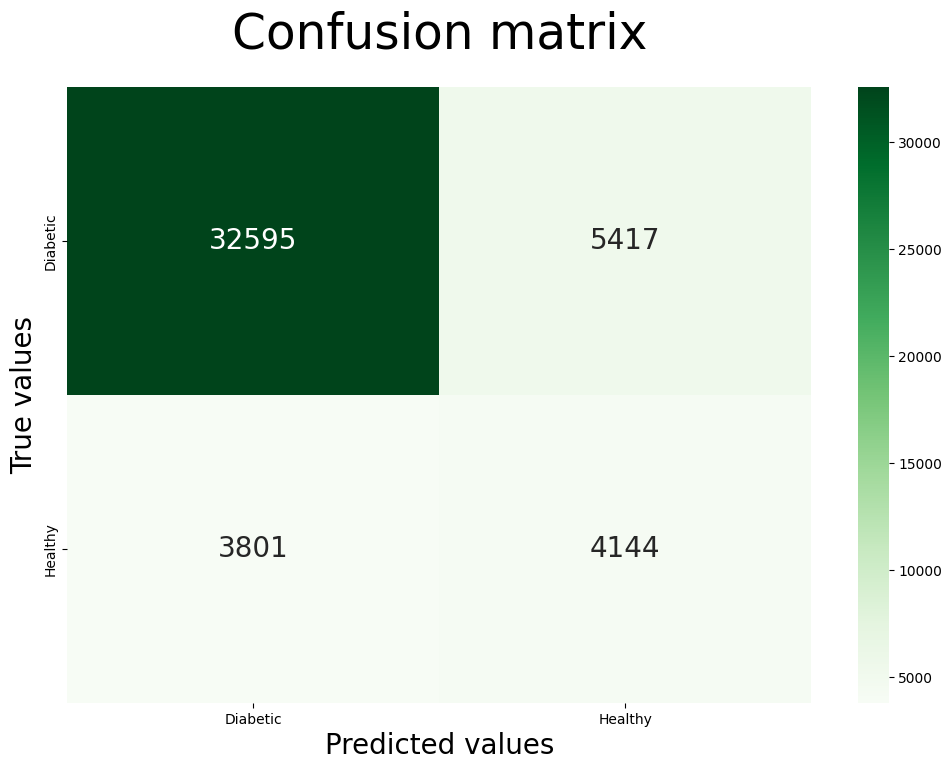

In [ ]:
rand_state = 0
# Call show model result and pass parameters from Hyperparameter tuning
output = show_model_results(X, y,'Gradient Boost',GradientBoostingClassifier,learning_rate=0.01,loss='exponential',max_depth=10,max_features=1,n_estimators=200,rand_state=rand_state)
# Save outputs in a dictionary
models_resultsGB = ({
    'Model Name': output[1],
    'Model Score': output[0],
    'F1 Score': output[2],
    'Precision Score': output[3],
    'Recall Score': output[4]
})

**4. Decision Tree**

The model Decision Tree with parameters : {'criterion': 'entropy', 'max_depth': 100, 'random_state': 5, 'splitter': 'random'}

***************************************************************
Model name:        	 Decision Tree
Model Parameters:  	 {'criterion': 'entropy', 'max_depth': 100, 'random_state': 5, 'splitter': 'random'}
Model Score:       	 0.760645821093631
Model Precision Score:   0.3190380286695889
Model Recall Score:  	 0.33895531780994337
Model F1 Score:  	 0.3286952276333456
***************************************************************


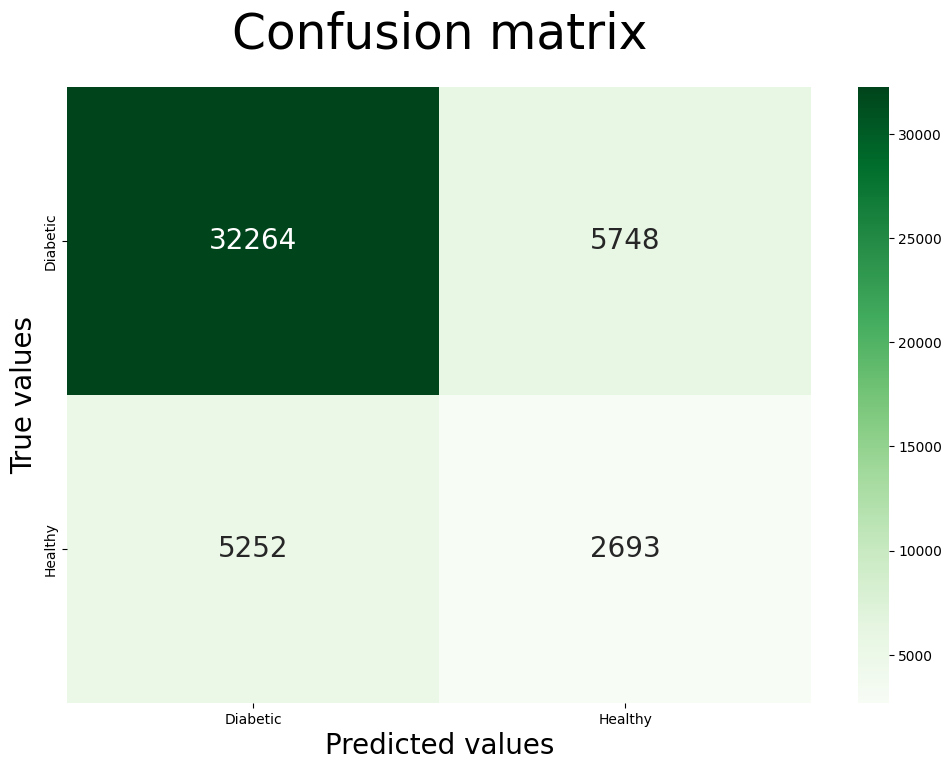

In [ ]:
# Call show model result and pass parameters from Hyperparameter tuning

# 'criterion': 'entropy', 'max_depth': 100, 'random_state': 5, 'splitter': 'random'
output = show_model_results(X,y,'Decision Tree',DecisionTreeClassifier,10,criterion='entropy',max_depth=100,random_state=5,splitter='random')
# Save outputs in a dictionary
models_resultsDT = ({
    'Model Name': output[1],
    'Model Score': output[0],
    'F1 Score': output[2],
    'Precision Score': output[3],
    'Recall Score': output[4]
})

**5. Logistic Regression**

The model Logistic Regression with parameters : {'C': 5, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}

***************************************************************
Model name:        	 Logistic Regression
Model Parameters:  	 {'C': 5, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}
Model Score:       	 0.7147768566268469
Model Precision Score:   0.34742006028725103
Model Recall Score:  	 0.7398363750786658
Model F1 Score:  	 0.4728120978120978
***************************************************************


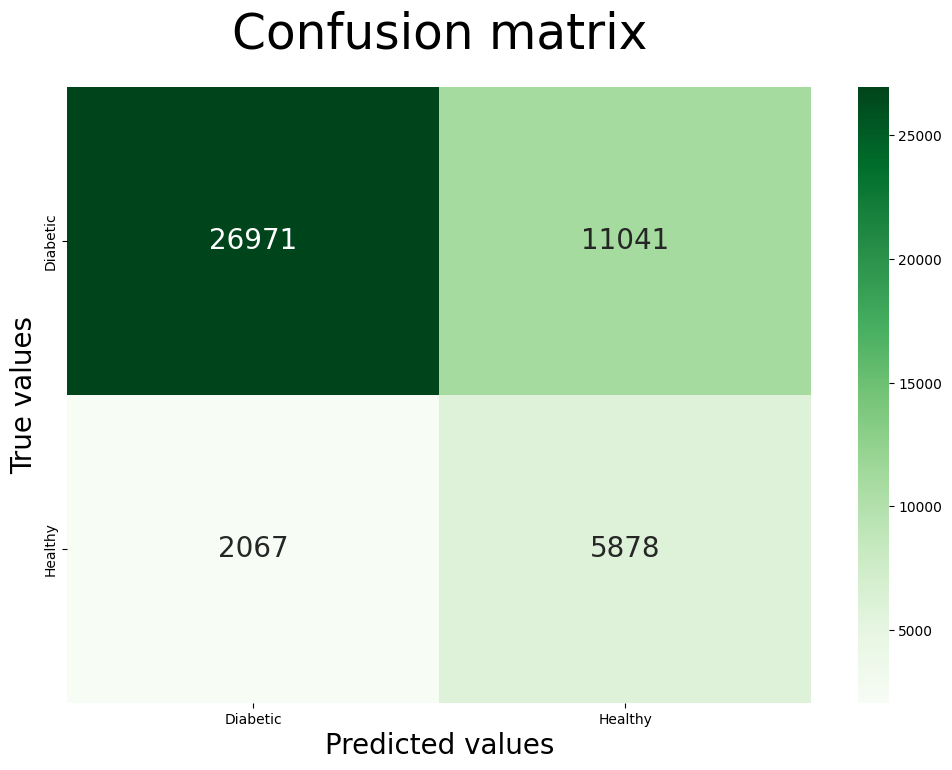

In [ ]:
# 'C': 5, 'multi_class': 'auto', 'penalty': 'l1', 'random_state': 2, 'solver': 'saga'
# Call show model result and pass parameters from Hyperparameter tuning
output = show_model_results(X,y,'Logistic Regression',LogisticRegression,2,C=5,multi_class='auto',penalty='l1',solver='saga')
# Save outputs in a dictionary
models_resultsLR = ({
    'Model Name': output[1],
    'Model Score': output[0],
    'F1 Score': output[2],
    'Precision Score': output[3],
    'Recall Score': output[4]
})

**6. Artificial Neural Network**

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
sm = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=2,stratify=y)
X_train, y_train = sm.fit_resample(X_train, y_train)
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Creating a Neural Network with 1 input layer and 3 hidden layers with activation function ***RELU***
# Then one output layer with ***sigmoid*** function
model = keras.Sequential([
    keras.layers.Flatten(input_dim=X_train.shape[1]),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dense(125, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])
#Compile our model using Optimizer adam and loss function ,
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Model trains for 150 epochs and validates our model on X_test and y_test.
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100,validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
9503/9503 [==============================] - 37s 3ms/step - loss: 0.4097 - accuracy: 0.8020 - val_loss: 0.4275 - val_accuracy: 0.8020
Epoch 2/100
9503/9503 [==============================] - 31s 3ms/step - loss: 0.3453 - accuracy: 0.8326 - val_loss: 0.3897 - val_accuracy: 0.8239
Epoch 3/100
9503/9503 [==============================] - 31s 3ms/step - loss: 0.3321 - accuracy: 0.8391 - val_loss: 0.4416 - val_accuracy: 0.7960
Epoch 4/100
9503/9503 [==============================] - 31s 3ms/step - loss: 0.3253 - accuracy: 0.8429 - val_loss: 0.3916 - val_accuracy: 0.8174
Epoch 5/100
9503/9503 [==============================] - 31s 3ms/step - loss: 0.3204 - accuracy: 0.8453 - val_loss: 0.4331 - val_accuracy: 0.7910
Epoch 6/100
9503/9503 [==============================] - 31s 3ms/step - loss: 0.3164 - accuracy: 0.8474 - val_loss: 0.4017 - val_accuracy: 0.8104
Epoch 7/100
9503/9503 [==============================] - 31s 3ms/step - loss: 0.3135 - accuracy: 0.8487 - val_loss: 0.4039 -

In [ ]:
y_predicted = model.predict(X_test)
y_predicted

1437/1437 [==============================] - 2s 1ms/step


array([[0.56966066, 0.35259056],
       [0.46759337, 0.4872213 ],
       [0.7193322 , 0.18764454],
       ...,
       [0.7620046 , 0.150554  ],
       [0.9276426 , 0.02533874],
       [0.91963845, 0.03156618]], dtype=float32)

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[0, 1, 0, 0, 0]

In [ ]:
y_test_labels = [np.argmax(i) for i in y_test]
y_test_labels[:5]

[0, 1, 0, 0, 0]

In [ ]:
from sklearn.metrics import classification_report
# Print-Out our classification Report
print(classification_report(y_test_labels,y_predicted_labels))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     38012
           1       0.49      0.31      0.38      7945

    accuracy                           0.82     45957
   macro avg       0.68      0.62      0.64     45957
weighted avg       0.80      0.82      0.81     45957



Text(95.72222222222221, 0.5, 'Truth')

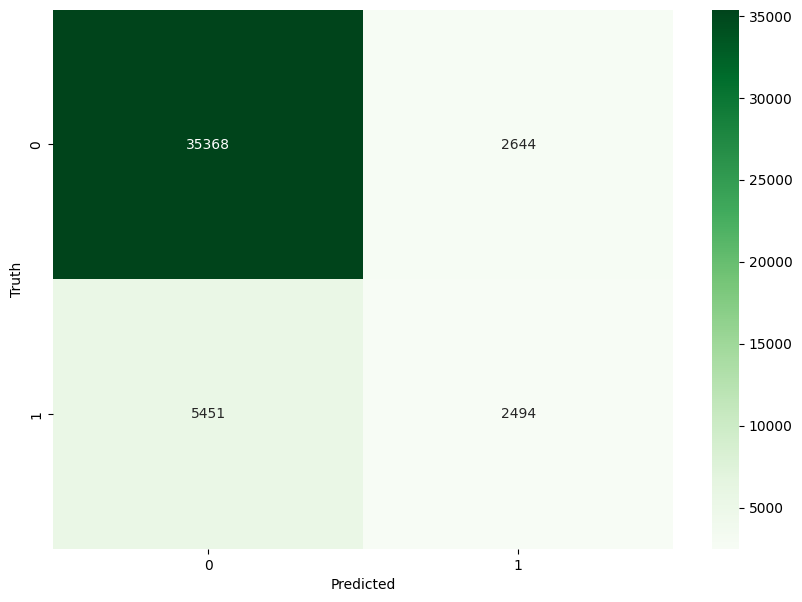

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test_labels,predictions=y_predicted_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d',cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
preScore = precision_score(y_test_labels,y_predicted_labels, average="macro")
recScore = recall_score(y_test_labels,y_predicted_labels, average="macro")
f1Score = f1_score(y_test_labels,y_predicted_labels, average="macro")

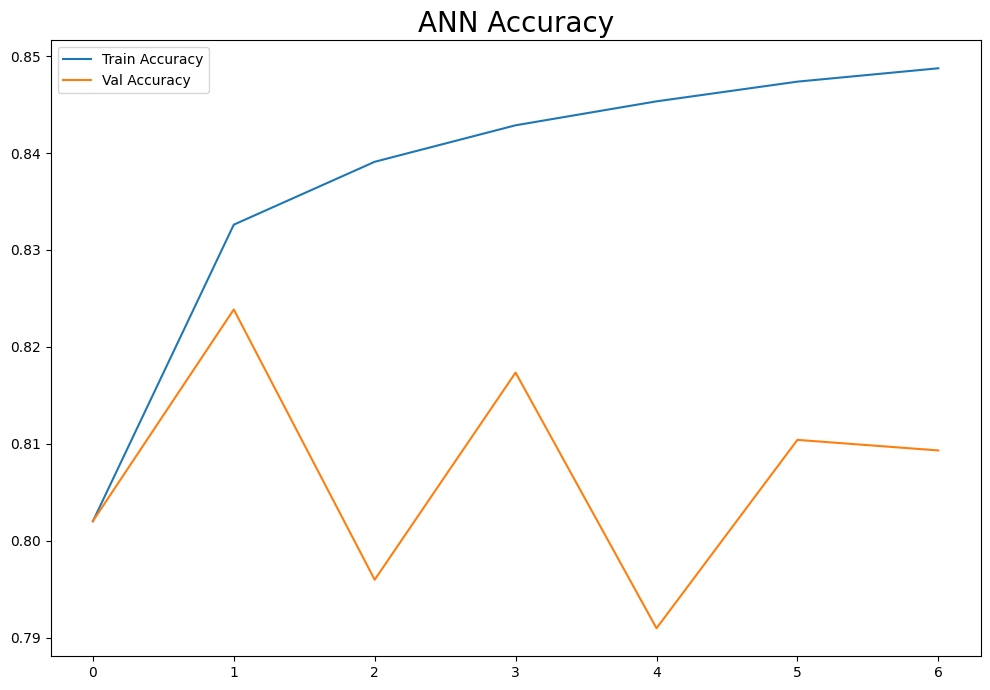

1437/1437 [==============================] - 3s 2ms/step - loss: 0.3897 - accuracy: 0.8239
Neural Network score     ========>>> 0.824


In [ ]:
## Plot History
fig = plt.figure(figsize=(12, 8))
plt.title('ANN Accuracy', size=20)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.legend()
plt.savefig("ANNAccuracyGraph.png")
plt.show()
model.evaluate(X_test,y_test)
score = np.round(model.evaluate(X_test, y_test, verbose=0)[1], 3)
print(f'Neural Network score     ========>>> {score}')
models_resultsANN = ({
    'Model Name': 'Artificial Neural Network',
    'Model Score': score,
    'F1 Score': f1Score,
    'Precision Score': preScore,
    'Recall Score': recScore
})

####**Results**

In [ ]:
myalgorithms = {
    'Logistic Regression':models_resultsLR,
    'Gradient Boost': models_resultsGB,
    'Decision Tree': models_resultsDT,
    'Random Forest Classifier': models_resultsRC,
    'K Nearest Neighbour': models_resultsKN,
    'Artificial Neural Network': models_resultsANN
}
myalgorithms

{'Logistic Regression': {'Model Name': 'Logistic Regression',
  'Model Score': 0.7147768566268469,
  'F1 Score': 0.4728120978120978,
  'Precision Score': 0.34742006028725103,
  'Recall Score': 0.7398363750786658},
 'Gradient Boost': {'Model Name': 'Gradient Boost',
  'Model Score': 0.7994211980764628,
  'F1 Score': 0.473437678510225,
  'Precision Score': 0.43342746574626084,
  'Recall Score': 0.5215859030837005},
 'Decision Tree': {'Model Name': 'Decision Tree',
  'Model Score': 0.760645821093631,
  'F1 Score': 0.3286952276333456,
  'Precision Score': 0.3190380286695889,
  'Recall Score': 0.33895531780994337},
 'Random Forest Classifier': {'Model Name': 'Random Forest',
  'Model Score': 0.8160236743042409,
  'F1 Score': 0.286076163134341,
  'Precision Score': 0.4345818368394048,
  'Recall Score': 0.213215859030837},
 'K Nearest Neighbour': {'Model Name': 'KNN',
  'Model Score': 0.7600365559109602,
  'F1 Score': 0.3206849821362572,
  'Precision Score': 0.314030643020871,
  'Recall Score

In [ ]:
myalgorithmsdf = pd.DataFrame(myalgorithms.values(),columns=['Model Name','Model Score','F1 Score','Precision Score','Recall Score'])
myalgorithmsdf.sort_values(by='Model Score',ascending=False, inplace=True)
myalgorithmsdf

,Model Name,Model Score,F1 Score,Precision Score,Recall Score
5,Artificial Neural Network,0.824000,0.639285,0.675931,0.622176
3,Random Forest,0.816024,0.286076,0.434582,0.213216
1,Gradient Boost,0.799421,0.473438,0.433427,0.521586
2,Decision Tree,0.760646,0.328695,0.319038,0.338955
4,KNN,0.760037,0.320685,0.314031,0.327627
0,Logistic Regression,0.714777,0.472812,0.347420,0.739836


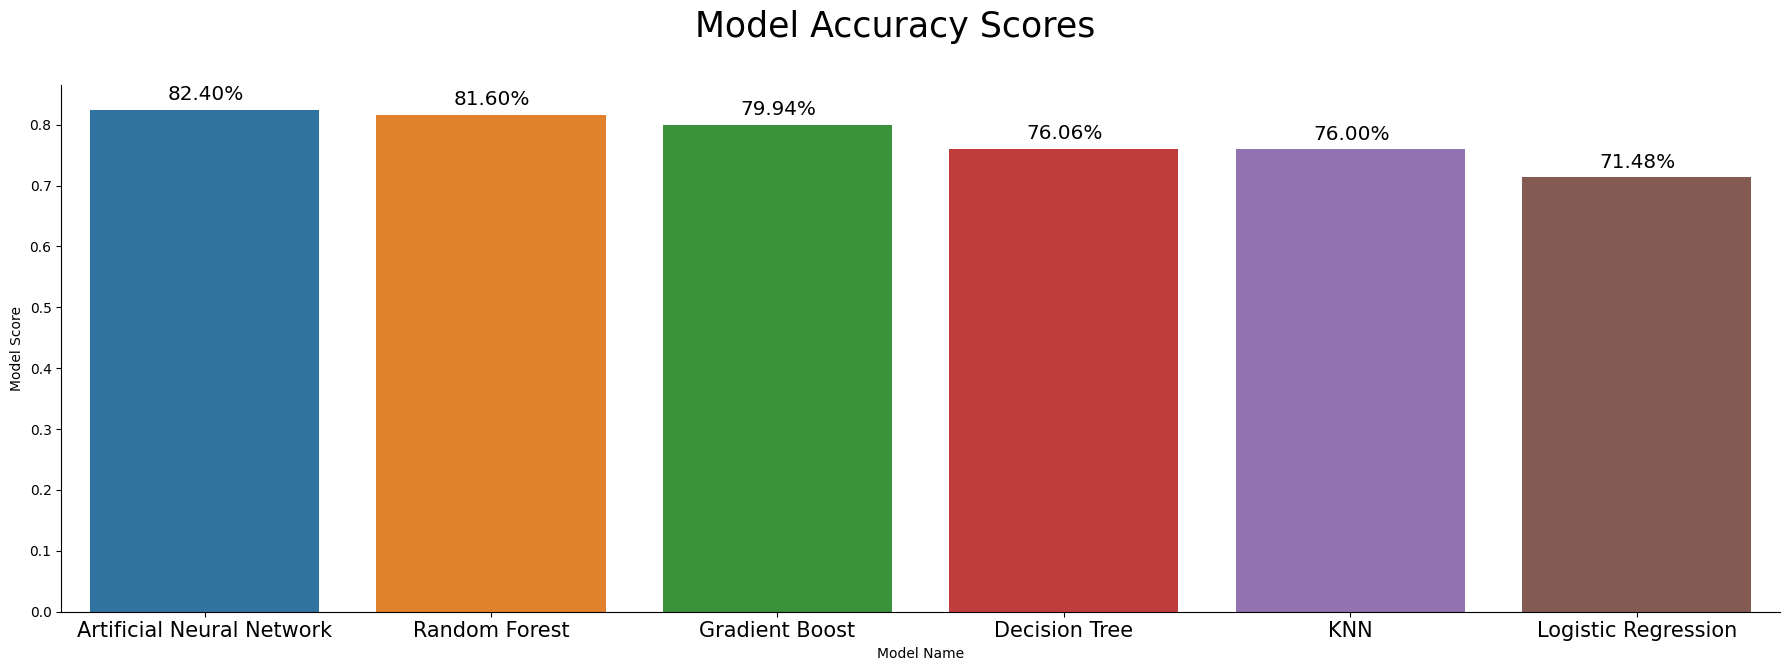

In [ ]:
g = sns.catplot(x='Model Name', y='Model Score', data=myalgorithmsdf,
                height=6, aspect=3, kind='bar', legend=True)
g.fig.suptitle('Model Accuracy Scores', size=25, y=1.1)
ax = g.facet_axis(0,0)
ax.tick_params(axis='x', which='major', labelsize=15)
for p in ax.patches:
    ax.text(p.get_x() + 0.27,
            p.get_height() * 1.02,
           '{0:.2f}%'.format(p.get_height()*100),
            color='black',
            rotation='horizontal',
            size='x-large')
plt.savefig("ModelAccuracy.png")

<h2 style='font-weight:bold;color:#ff0000;text-align:center'>    SHAP </h2>

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 9.2 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
sm = SMOTE(random_state=0)
X_train,y_train = sm.fit_resample(X_train,y_train)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

####**Feature Importance**

***Random Forest***


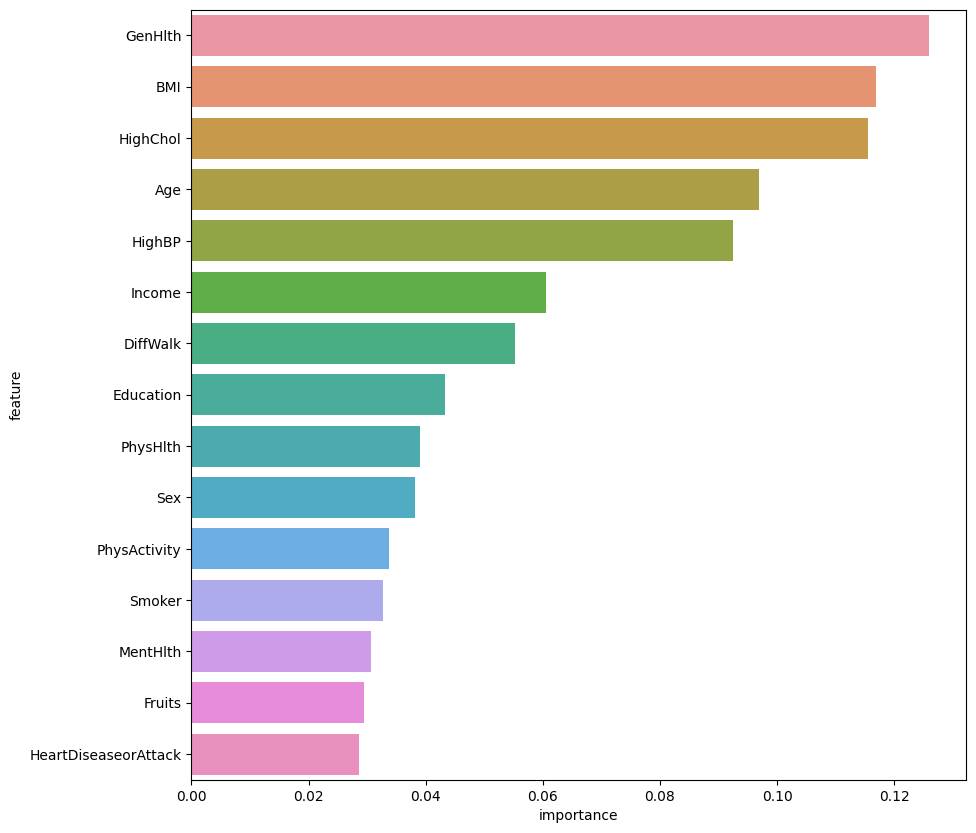

In [ ]:
RFModel = RandomForestClassifier(n_estimators=10,n_jobs=20)
RFModel.fit(X_train,y_train)
feature_importance_df = pd.DataFrame()
feature_importance_df['feature'] = X.columns
feature_importance_df['importance'] = RFModel.feature_importances_

feature_importance_df = feature_importance_df.sort_values('importance',ascending=False).reset_index()
print('***Random Forest***')
plt.figure(figsize=(10,10))
sns.barplot(x='importance',y='feature',data=feature_importance_df[:15])
plt.savefig("ShapValueRandomForest.png")
plt.show()

In [ ]:
# Gradient Boost Feature Importance

***Gradient Boost***


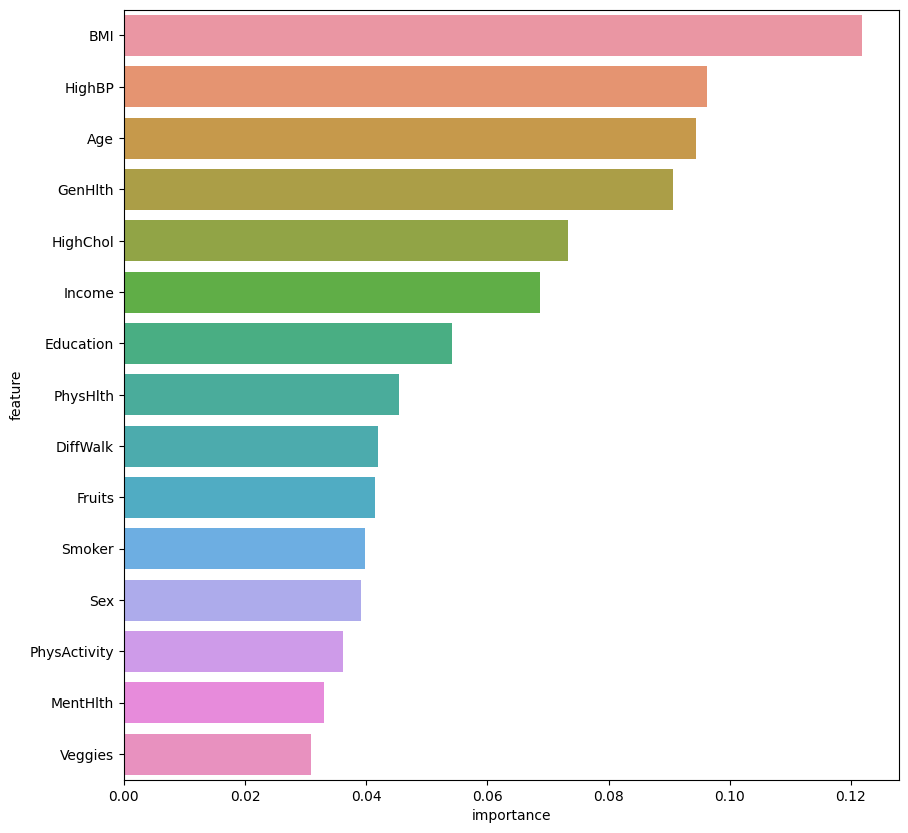

In [ ]:
GBModel = GradientBoostingClassifier(learning_rate=0.01,loss='exponential',max_depth= 50,max_features=1,n_estimators=200)
GBModel.fit(X_train,y_train)
feature_importance_df = pd.DataFrame()
feature_importance_df['feature'] = X.columns
feature_importance_df['importance'] = GBModel.feature_importances_

feature_importance_df = feature_importance_df.sort_values('importance',ascending=False).reset_index()
print('***Gradient Boost***')
plt.figure(figsize=(10,10))
sns.barplot(x='importance',y='feature',data=feature_importance_df[:15])
plt.savefig("ShapValueGradientBoost.png")
plt.show()